

This assignment is about the survival rate of children from the Titanic Dataset

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
def male_female_child(passenger): 
    age, sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

df['person'] = df[["Age", "Sex"]].apply(male_female_child,axis=1)
df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


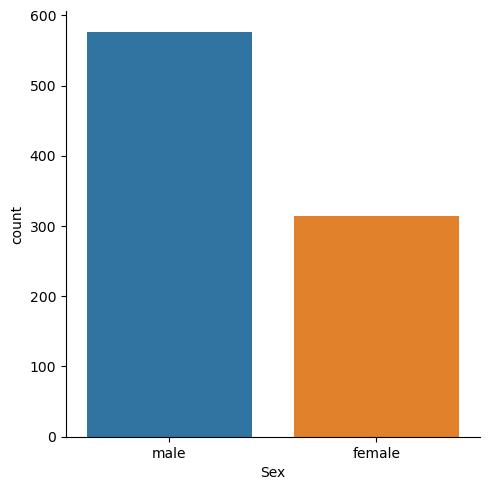

In [36]:
sns.catplot(x="Sex",kind="count", data=df)

We can observe from the Bar chat that the number of Male were almost double on the Titanic Journey

Number of Male were roughly 600 and Women were a bit more than 300


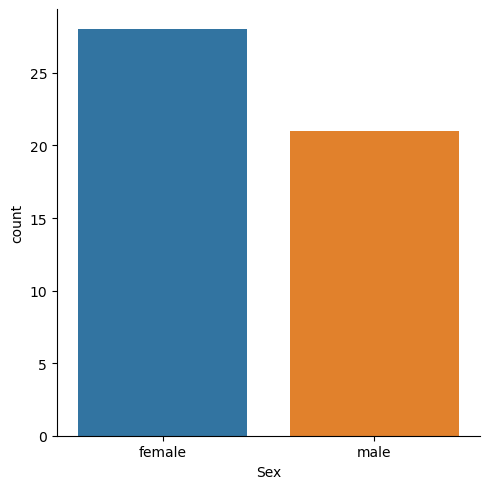

In [37]:
#Number of Children who survived

living_children = df[(df['Age'] < 16) & (df['Survived'] == 1)]
sns.catplot(x="Sex",kind="count", data=living_children)

If we examine the percentage of children who survived, we can observe that more female children managed to survive than of male children.

This may be due to the fact that women and children were saved first. Even for the kids, their mothers prioritised the girls first. And the sons were expected to accompany their fathers. 



array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

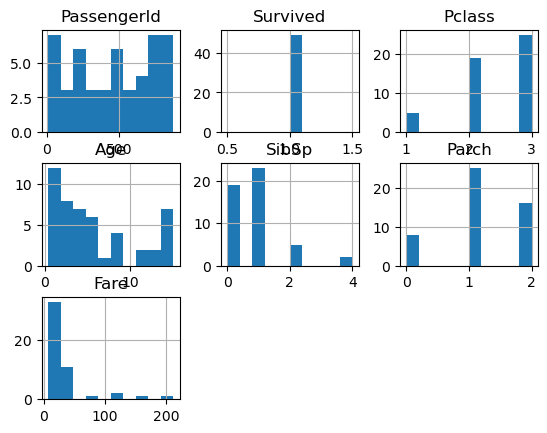

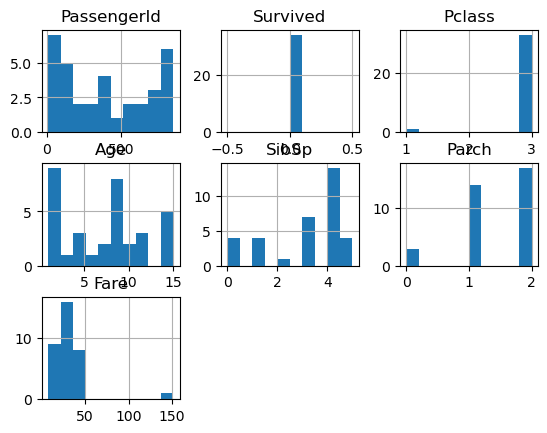

In [38]:
living_children.hist()

not_surviving_children.hist()

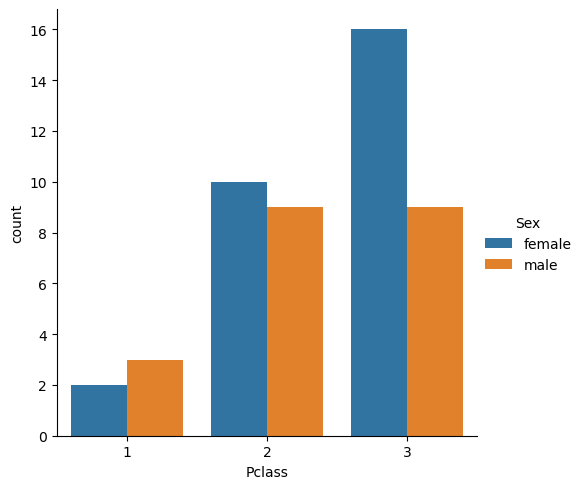

In [15]:
sns.catplot(x="Pclass", kind="count", hue="Sex", data=living_children)

This bar graph displays the PClass of the children that survived.

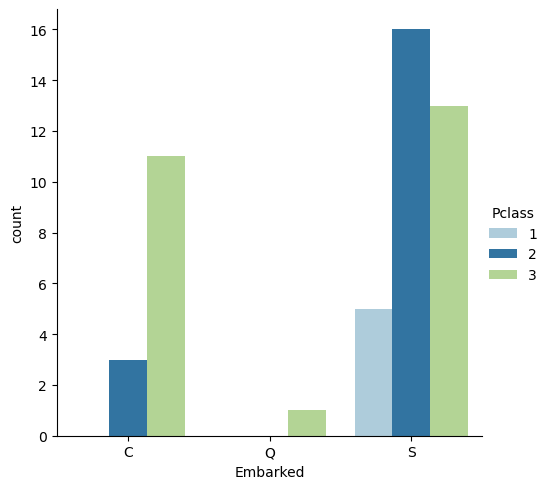

In [39]:
sns.catplot(x="Embarked",kind="count",data=living_children,hue="Pclass",order=["C","Q","S"],palette= "Paired")

We can see the Embarked and Pclass Ticket for survival rate of the Children 

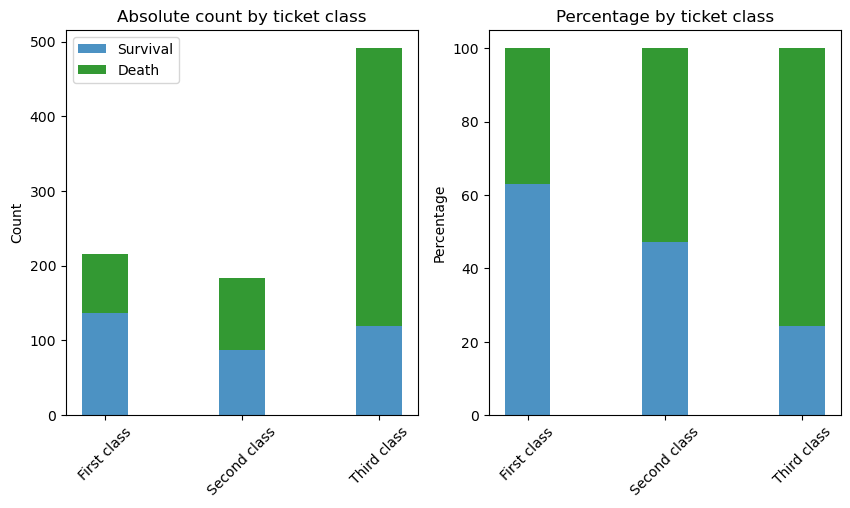

In [40]:
def get_counts(dataframe, factor, quality, status):
    target = dataframe[factor].where(dataframe[factor] == quality)
    class_count = target.where(dataframe['Survived'] == status).count()
    return class_count

class1_survival_count = get_counts(df, 'Pclass', 1, 1)
class2_survival_count = get_counts(df, 'Pclass', 2, 1)
class3_survival_count = get_counts(df, 'Pclass', 3, 1)
class1_death_count = get_counts(df, 'Pclass', 1, 0)
class2_death_count = get_counts(df, 'Pclass', 2, 0)
class3_death_count = get_counts(df, 'Pclass', 3, 0)


def gen_plot(survival_array, death_array, by_factor, x_ticks):
   
    abs_survival_list = np.array(survival_array)
    abs_death_list = np.array(death_array)
    N = len(abs_survival_list)
    ind = np.arange(N)
    width = 1 / N

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
    # Absolute count
    ax1.bar(ind, abs_survival_list, width, label='Survival', alpha=0.8)
    ax1.bar(ind, abs_death_list, width, color='green', label='Death', alpha=0.8, bottom=abs_survival_list)

    plt.sca(ax1)
    plt.xticks(ind, x_ticks)

    ax1.set_title('Absolute count ' + by_factor)
    ax1.set_ylabel('Count')
    ax1.legend(loc='upper left')

    plt.setp(plt.gca().get_xticklabels(), rotation=45)
    
    
    # Percentage
    per_survival_list = (abs_survival_list / (abs_survival_list + abs_death_list)) * 100
    per_death_list = (abs_death_list / (abs_survival_list + abs_death_list)) * 100

    ax2.bar(ind, per_survival_list, width, label='Survival percentage', alpha=0.8)
    ax2.bar(ind, per_death_list, width, color='green', label='Death percentage', alpha=0.8, bottom=per_survival_list)

    plt.sca(ax2)
    plt.xticks(ind, x_ticks)

    ax2.set_title('Percentage ' + by_factor)
    ax2.set_ylabel('Percentage')

    plt.setp(plt.gca().get_xticklabels(), rotation=45)

    return plt.show()

gen_plot([class1_survival_count, class2_survival_count, class3_survival_count],
         [class1_death_count, class2_death_count, class3_death_count],
         'by ticket class',
         ['First class', 'Second class', 'Third class'])

Overall, the type of ticket that a passenger purchased was essential to their life, including that of any children. The majority of first class passengers survived. In a way, both the children and those with first class tickets were rescured first.